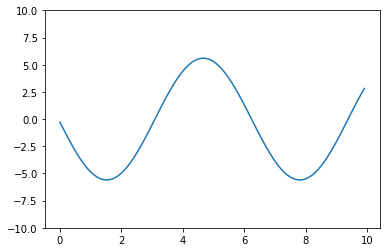

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from ipywidgets import interact, HTML, FloatSlider, Button, Output, Accordion
from IPython.display import clear_output, display

slider1 = FloatSlider(value=5,description='magnitude', min=0, max=10, step=0.1)
slider2 = FloatSlider(value=pi, description='phase', min=0, max=4*np.pi, step=0.1)
slider3 = FloatSlider(description='time', min=0, max=100, step=0.1)
button = Button(description='update')
# widget 'box' for matplotlib plot
image = Output(value=5)


# Here is the data set we want to plot 
data = [[],[]]
t = 0.
state = [t]

def update_data(time, phase, magnitude):
    """Update the data set - this could come from an updated file
    on disk."""
    x = np.arange(0, 10, 0.1)
    y = magnitude*np.sin(x + time + phase)
    # update global variable
    data[0] = x
    data[1] = y

    
def get_data():
    return data[0], data[1]


def update_plot(arg=None):
    magnitude = slider1.value
    phase = slider2.value
    state[0]= slider3.value
    time = state[0]
    update_data(time, phase, magnitude)
    x, y = get_data()

    # fig = plt.figure()
    plt.plot(x, y)
    plt.ylim(-10, 10)

    with image:
        display(plt.gcf())

    clear_output(wait=True)
    
    # print("update_plot: arg='{}'".format(arg))

slider1.observe(update_plot, 'value')
slider2.observe(update_plot, 'value')
slider3.observe(update_plot, 'value')
image.observe(update_plot, 'value')
button.on_click(update_plot)


display(button, slider1, slider2, slider3)
update_plot()

# 
#for i in range(100):
#    slider3.value += 0.1
#    time.sleep(1)

In [2]:
image.value = 6

Can update the slider, but the plot (above) doesn't update.

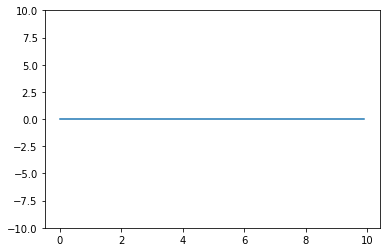

In [7]:
slider1.value = 0

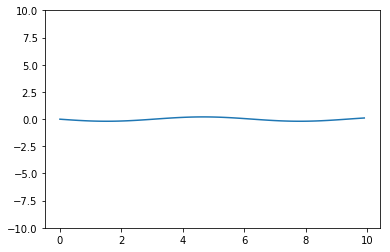

In [5]:
slider1.value +=0.1